## **Sentiment Analysis of Tweets using BERT**

- Customer feedback is very important for every organization, and it is very valuable if it is honest.

- Twitter is one of the best platforms to capture honest customer reviews and opinions.

- The priority is to understand the mood of the customers by looking at their feedback text. Whether they are happy, sad, or angry.
    - This is known as **Sentiment Analysis**.

There are many ways to perform sentiment analysis.
- Popular ones are the bag of words model and Textblob. 
- Sentiment analysis on a given text data using BERT, etc.

## BERT

BERT stands for **Bidirectional Encoder Representations from Transformers** and it is a state-of-the-art machine learning model used for NLP tasks like text classification, sentiment analysis, text summarization, etc.

To put the timeline in perspective, the order in which things evolved is:

`RNN -> LSTM -> Encoder-Decoder -> Transformers-> BERT`

- First came the concept of **Back Propagation Through Time(BPTT)** in the **Recurrent Neural Networks(RNN)**:
    - This started a revolution in machine translation(e.g. French to English conversion). 
    - Because now we can learn lots of translation examples by using the numeric representation of words in the input and output sentences. 
    - It can be from any language, we can always find the numeric representation of these words, popular ones are Word2Vec, GloVe, etc.

The input sequence is a set of numbers representing the input text in English and the output sequence is a set of numbers representing the expected output text in Hindi.

In [1]:
import pandas as pd
import numpy as np

# Importing the dataset
IndigoTweets=pd.read_csv('../Datasets/IndigoTweets.csv', encoding='latin')
print(IndigoTweets.shape)
IndigoTweets.head(10)

(1077, 1)


,Tweets
0,Hackers galore Also being sued for passed deb...
1,Hackers galore Also being sued for passed deb...
2,London England UK Come rock with ya girl Fri...
3,NewsAlert BengaluruVijaywada Indigo flight 6E...
4,Hackers galore Also being sued for passed debt...
5,Just Because You Are available at denim tiedy...
6,Why do you start boarding when your aircraft i...
7,BengaluruVijaywada Indigo flight 6E7204 skids ...
8,I love you indigo jael maybe we can make i so...
9,IndigoampSpiceJet Extend to T2


#### Installing transformers library

In [2]:
# Installing library 'transformers' which contains the BERT implementation
!pip install transformers

# Installing tensorflow
!pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Downloading Sentiment Analysis Model

In [3]:
!pip install tf-keras


[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install torch torchvision torchaudio


[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Importing the pipeline module
from transformers import pipeline

# Downloading the sentimenet analysis model
SentimentClassifier = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english", framework="tf")

m:\Case_Studies\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
Device set to use 0


In [6]:
SentimentClassifier

### Sample Call using the Sentiment Classifier Function
- Sample call of the Sentiment Classifier function to check the output response

In [7]:
# Calling the sentiment analysis function for 3 sentences
SentimentClassifier(["I hope we get all these concepts! Its killing the neurons of our brain",
                     "We had a nice experience in this trip",
                     "Houston we have a problem"
                      ])

[{'label': 'NEGATIVE', 'score': 0.9997034668922424},
 {'label': 'POSITIVE', 'score': 0.9998235106468201},
 {'label': 'NEGATIVE', 'score': 0.9944384098052979}]

Writing a function which will use these scores and return a final sentiment like positive, negative or neutral from the output label.

In [8]:
# Defining a function to call for the whole dataframe
def FunctionBERTSentiment(inpText):
  return(SentimentClassifier(inpText)[0]['label'])

# Calling the function
FunctionBERTSentiment(inpText="Houston we have a problem")

'NEGATIVE'

In [9]:
# Calling BERT based sentiment score function for every tweet
IndigoTweets['Sentiment']=IndigoTweets['Tweets'].apply(FunctionBERTSentiment)
IndigoTweets.head(10)

,Tweets,Sentiment
0,Hackers galore Also being sued for passed deb...,NEGATIVE
1,Hackers galore Also being sued for passed deb...,NEGATIVE
2,London England UK Come rock with ya girl Fri...,POSITIVE
3,NewsAlert BengaluruVijaywada Indigo flight 6E...,NEGATIVE
4,Hackers galore Also being sued for passed debt...,NEGATIVE
5,Just Because You Are available at denim tiedy...,NEGATIVE
6,Why do you start boarding when your aircraft i...,NEGATIVE
7,BengaluruVijaywada Indigo flight 6E7204 skids ...,NEGATIVE
8,I love you indigo jael maybe we can make i so...,POSITIVE
9,IndigoampSpiceJet Extend to T2,NEGATIVE


In [12]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d7/68/0d03098b3feb786cbd494df0aac15b571effda7f7cbdec267e8a8d398c16/matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/5e/fe/4029038b4e1c4485cef18e480b0e2cd2d755448bb071eb9977caac80b77b/contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached cycl


[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

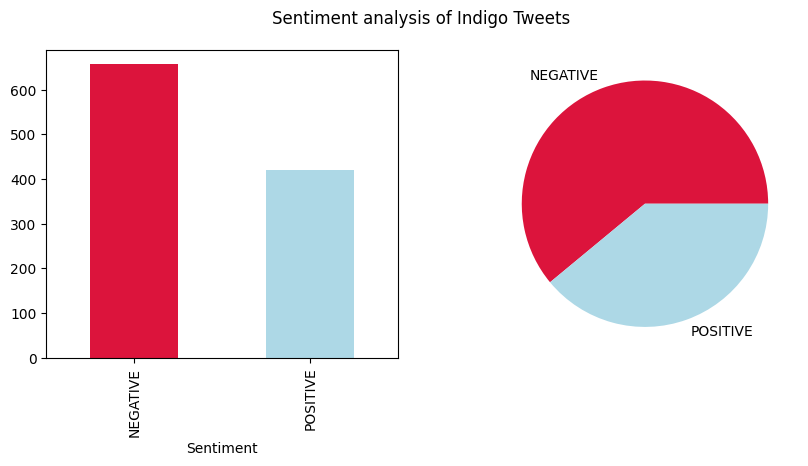

In [13]:
# Visualizing the overall sentiment distribution
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Indigo Tweets")

# Grouping the data
GroupedData=IndigoTweets.groupby('Sentiment').size()

# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'lightblue'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson', 'lightblue'])

## Conclusion

- Transfer learning is the way forward in NLP.
- It helps leverage the research work done by big organizations like Google, Facebook, etc.
- It helps in reducing the training time and the amount of data required for training a model and thus improving the search results dramatically.
- Sentiment analysis using BERT is completed.